# Car Price Prediction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error

# Read Dataset

In [2]:
dataset=pd.read_csv("sumit.csv")

In [3]:
dataset.head()

,S.No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
dataset.shape

(6019, 14)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
print(dataset.keys())

Index(['S.No', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


array([[<AxesSubplot:title={'center':'S.No'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Kilometers_Driven'}>,
        <AxesSubplot:title={'center':'Seats'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

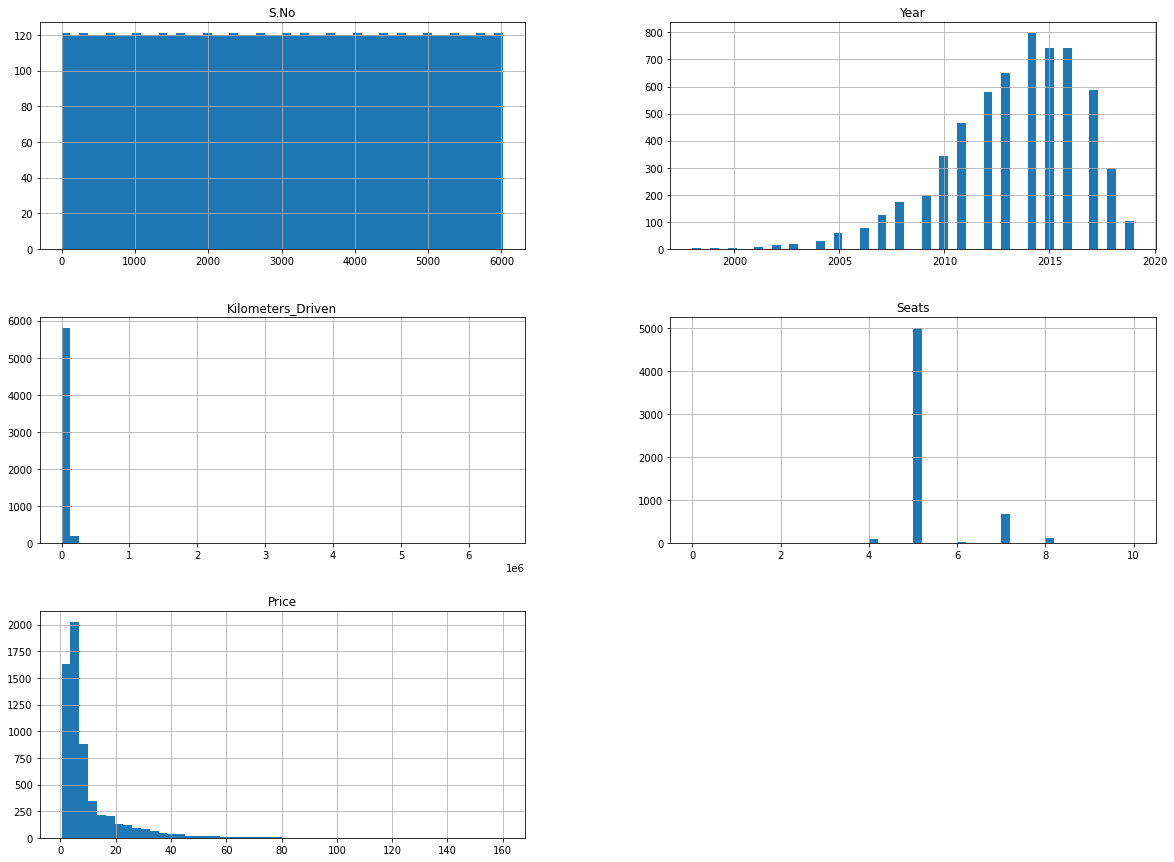

In [7]:
dataset.hist(bins=50,figsize=(20,15))

In [8]:
dataset['Name'].value_counts()

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1876, dtype: int64

In [9]:
dataset['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [10]:
dataset['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [11]:
dataset['Transmission'].value_counts() 

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

In [12]:
dataset['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [13]:
dataset['Seats'].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [14]:
dataset['Year'].value_counts()

2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
2000      4
1998      4
1999      2
Name: Year, dtype: int64

# Cleaning Dataset

In [15]:
dataset=dataset[~dataset['Engine'].isna()]

In [16]:
dataset=dataset[~dataset['Mileage'].isna()]

In [17]:
dataset=dataset[~dataset['Power'].isna()]

In [18]:
dataset=dataset[~dataset['Seats'].isna()]

In [19]:
dataset['Engine']=dataset['Engine'].str.split(' ').str.get(0).astype(int)

In [20]:
dataset['Mileage']=dataset['Mileage'].str.split(' ').str.get(0).astype(float)

In [21]:
dataset['Power']=dataset['Power'].str.split(' ').str.get(0)

In [22]:
dataset['Power']=dataset['Power'].str.replace('null','0')

In [23]:
dataset['Power']=dataset['Power'].astype(float)

In [24]:
dataset['Name']=dataset['Name'].str.split(' ').str.slice(0,2).str.join(' ').astype(str)

In [25]:
dataset=dataset.drop('S.No',axis=1)

In [26]:
dataset=dataset.drop('New_Price',axis=1)

In [27]:
#dataset=dataset['Name'].astype(float)

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   int32  
 9   Power              5975 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(4), int32(1), int64(2), object(5)
memory usage: 583.5+ KB


In [29]:
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74


In [30]:
dataset.to_csv('Cleaned car.csv')

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Kilometers_Driven'}>,
        <AxesSubplot:title={'center':'Mileage'}>],
       [<AxesSubplot:title={'center':'Engine'}>,
        <AxesSubplot:title={'center':'Power'}>,
        <AxesSubplot:title={'center':'Seats'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

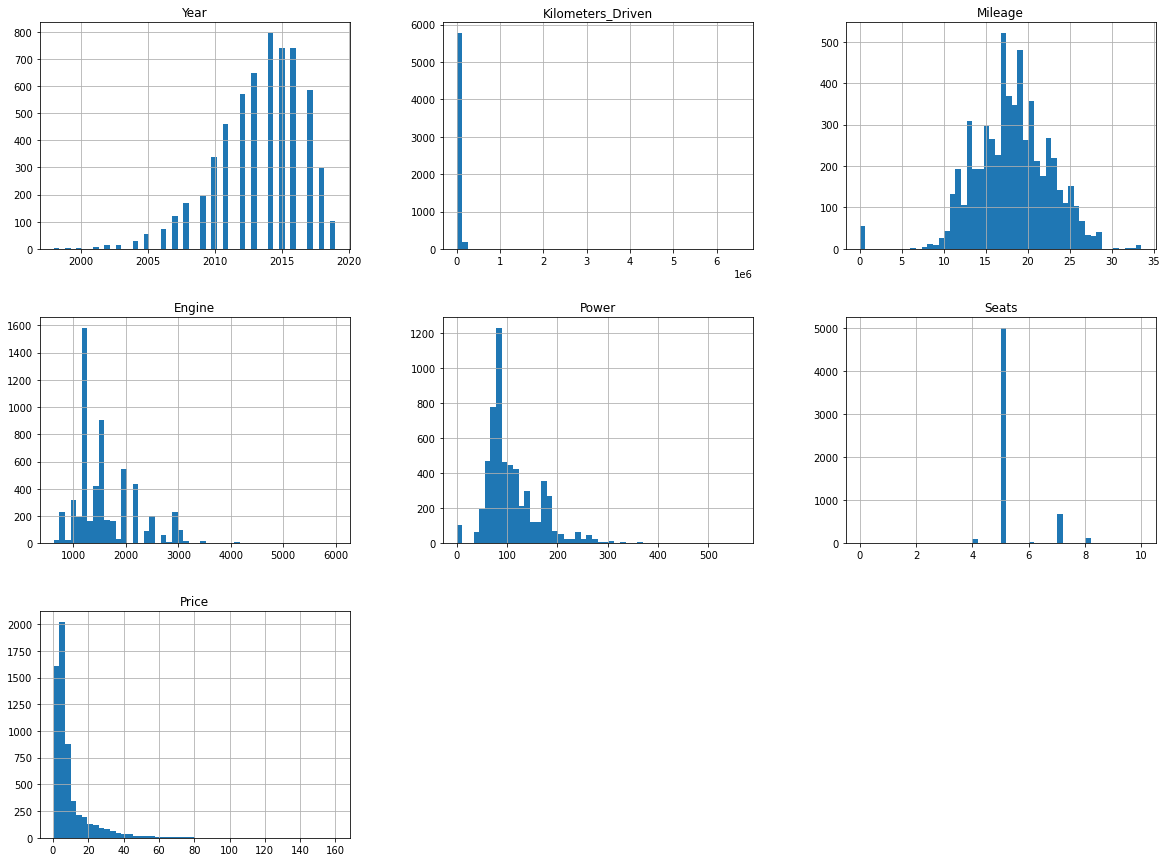

In [31]:
dataset.hist(bins=50,figsize=(20,15))

# Model

In [32]:
x=dataset.drop(columns='Price')
y=dataset['Price']

# Train-Test Splitting

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
oht=OneHotEncoder()
oht.fit(x[['Name','Location','Fuel_Type','Owner_Type','Transmission']])

OneHotEncoder()

In [35]:
column_trans=make_column_transformer((OneHotEncoder(categories=oht.categories_),['Name','Location','Fuel_Type','Owner_Type','Transmission']),
                                     remainder='passthrough')

In [36]:
#lr=LinearRegression()
lr=RandomForestRegressor()
#lr=DecisionTreeRegressor()

In [37]:
pipe=make_pipeline(column_trans,lr)

In [38]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador Classic', 'Audi A3', 'Audi A4', 'Audi A6', 'Audi A7',
       'Audi A8', 'Audi Q3', 'Audi Q5', 'Audi Q7', 'Audi RS5', 'Audi TT',
       'BMW 1', 'BMW 3', 'BMW 5', 'BMW 6', 'BMW 7', 'BMW X1', 'BMW X3',
       'BMW X5', 'BMW X6', 'BMW Z4', 'Bentley Continental',...
                                                                            array(['Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
       'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune'],
      dtype=object),
                                                                            array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object),
                                                                            array(['First', 'Fourth & Above', '

In [39]:
y_pred=pipe.predict(x_test)

In [40]:
y_pred

array([11.0475,  1.3823, 15.1819, ..., 18.1276,  6.4452, 14.9216])

In [41]:
print("R Square value :" ,r2_score(y_test,y_pred))

R Square value : 0.9054330279700956


In [42]:
import pickle

In [43]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

# Predicting the price 

In [44]:
x=pipe.predict(pd.DataFrame([['Audi A4','Pune',2012,20000,'CNG','Manual','First',20.77,1248,88.76,5.0]],columns=
                            ['Name','Location', 'Year', 'Kilometers_Driven','Fuel_Type','Transmission', 'Owner_Type',
                             'Mileage', 'Engine', 'Power', 'Seats',]))
print('Predicted Value in Lakhs :',x)

Predicted Value in Lakhs : [3.867]
